# 9. Bayesian Statistics I

## 9.1 Intended learning objectives

## Part 1
<div class="alert alert-block alert-warning">
<b> Intended learning objectives:</b> 
    
By the end of this session you will be able to:
* Compare the notions of probability and likelihood in Bayesian and Frequentist paradigms  
* Understand the notions of prior and posterior distributions   
* Apply Bayes Theorem in the discrete case
    
</div>

## Part 2
<div class="alert alert-block alert-warning">
    
By the end of this session you will be able to:

Understand and apply the basic principles of Bayesian analysis using proportions, specifically: 

* Use the beta distribution as a prior and derive the posterior distribution  
* Obtain credible HPD intervals for the parameter    
* Obtain prior and posterior predictive distributions  
* Understand the concept of conjugate priors  

</div>


## 9.2 Introduction  

So far in this module, we have looked at frequentist or classical statistical ideas, such as maximum likelihood estimation, hypothesis testing and p-values. Underlying the frequentist approach is the belief that there is a true state of reality, and that parameters have a fixed and true value. Probabilities are long-run frequencies; for example, the probability of a driver in London having a car accident is a fixed value between 0 and 1. A typical way of estimating this value is to take a sample of observations, construct a likelihood function for these observations, and to obtain the parameter value that maximizes the likelihood. When we take a Bayesian approach, the parameter we wish to estimate is considered to be a random variable, and probabilities may represent a subjective belief about the state of uncertainty, or there may be a data generating distribution underlying the random parameter. For example, you may have a prior belief about the probability of a driver in London having a car accident, and after collecting a sample of data, you combine your prior beliefs with the likelihood for those observations to construct an updated belief - the posterior. Your belief may change in light of the data. Bayesian methods sometimes require numerical integration, and cheaper computing has made Bayesian approaches more feasible in the last 20 years. Bayesian approaches are likely to be an important part of working in Health Data Science; in the next two sessions, we introduce the fundamental principles.


### Acknowledgements

These notes are heavily based on the Foundations course material created by Alex Lewin and Alexina Mason, which was previously developed by James Carpenter, Marcel Zwahlen and Beat Neuenschwander. Some sections are inspired also by notes from Michail Papathomas. We are grateful for their work and permission to re-use. 


## Part 1:
## 9.3 Probability 
In Session 2, we learned about probability in the frequentist sense: the proportion of times an event occurs in the long-run. Let's have a look at the following two scenarios:

1. A research group wishes to know the probability that a baby who is born in a particular hospital ward has cystic fibrosis. They look at the records on screening tests done at birth to investigate.  

2. A 34 year old woman attends her GP practice, worried that she has cancer because she has had feelings of “fullness” and “bloating” as well as mild nausea for the last 2 weeks. The patient mentions ovarian, bowel and pancreatic cancer as concerns having read about her symptoms on the internet. The rest of the history as well as physical examination are unremarkable. If the GP's assessment of the risk were above a certain level, the GP might refer the patient for tests (collect more data). In this case, the GP concludes that the current information about the patient suggests there is a very low risk that the patient has cancer. 

> What is the quantity that we trying to estimate in each scenario?   
> What is the frequentist definition of probability in each of these settings? Does it make sense?    

A key problem with the frequentist paradigm is that the "long-run" frequency definition is not always relevant, or even appropriate, as we see in the second example above. Further, notice that the GP uses information from different sources to draw his/her conclusion about the probability that the patient has cancer. This synthesis of information can be incorporated into a Bayesian framework. A frequentist, in contrast, would tackle this problem by thinking about:

> a) the probability of the patient having these symptoms, given that she has cancer;  
> b) the probability of the patient having these symptoms, given that she does not have cancer; 

and comparing the two probabilities. Note that this does not take into account the extra information about the context. 


## 9.4 Bayesian Inference 

The underlying concept for Bayesian inference essentially works as follows. We have some population parameter $\theta$ which we wish to make inference on, and the likelihood $p(y|\theta)$ which tells us how likely different values of $y$ are, conditional on different parameter values $\theta$. In the frequentist approach, $\theta$ is considered to be a fixed, but unknown, constant. Inference is then based on the likelihood $p(\mathbf{y}|\theta)$, where $\mathbf{y} = \left\{y_1, . . . ,y_n\right\}$ is a sample of observations from the population. The frequentist approach looks at the distribution of the data given $\theta$ to estimate $\theta$ by using, for example, the maximum likelihood approach which we covered in Session 6.   

In the Bayesian paradigm, we no longer assume that the parameters have a fixed true value, but consider $\theta$ to be a random quantity with an unknown distribution, which we wish to estimate. This distribution is denoted by $p(\theta|y)$, and so we look at the distribution of the parameter, having seen data $y$. To achieve this, we will have to specify a prior probability distribution, denoted $p(\theta)$, which represents our initial beliefs about the distribution of $\theta$ 
prior to observing any data. In some situations, when we are trying to estimate a parameter $\theta$ we have some knowledge, about the possible value of $\theta$ before we take into account the data that we observe.   

For example, consider the way a physician makes diagnostic decisions. A patient presents with a set of symptoms, concerned that they might have a certain disease. The physician assesses the probability that this patient has this disease, based on symptoms, family history, alternative explanations of symptoms and prevalence of the disease (their prior view that the patient has the disease). The physician might send the patient for a diagnostic test (collects some data) if her prior assessment of risk is above some threshold. Then the physician re-assesses the chance that the patient has this disease, taking account of the results and reliability of the diagnostic test (updates their prior in light of the data to get a posterior view on whether the patient has the disease). Depending on their certainty, the physician may then send the patient for further diagnostic tests. This thought process can be represented by the figure below and is analogous to Bayesian thinking.

   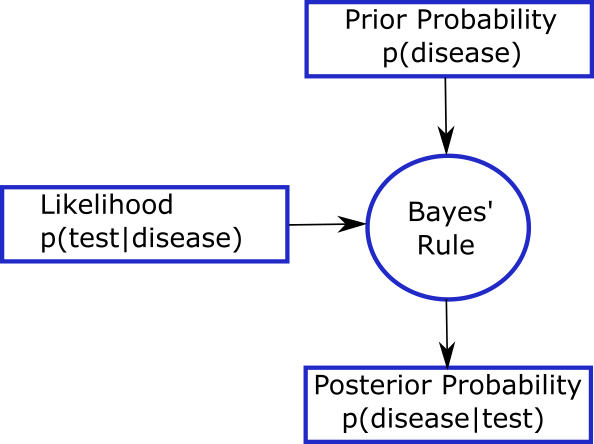

In this example, the physician is assessing the probability that the patient has the disease. It is the physician's prior probability based on their own training, knowledge and experience; a colleague may have a different prior probability. Here, prior probability is being defined subjectively. The size of the probability represents the physician's degree of belief about the occurrence of an event, i.e. their own personal assessment of how likely an event is, based on the evidence available to them before the test results are given. This definition corresponds more closely to the everyday, intuitive  usage of probability than a frequentist interpretation (where the probability of a particular event occurring can be interpreted as the proportion of times the event would/does occur in a large number of similar trials or situations). The prior probability of the event might come from direct data, known prevalance of disease in a population, or data from related populations. If such prior information does not exist, then it can be formally elicited from experts, but we would want to acknowledge the uncertainty in the experts' knowledge.  



## 9.5 Bayes Theorem 

Let's remind ourselves of Bayes theorem for discrete events, which we met in Session 2 (probability): 

If $A$ and $B$ are events, then 

\begin{equation}
P(A|B) = \frac{ P(B|A) P(A) } {P(B)} \propto P(B|A) P(A),
\end{equation}


or in words: 
\begin{equation}
\mbox{posterior probability of A given B} \propto \mbox{the likelihood of B given A} \times \mbox{the prior probability of A}.
\end{equation}


Also, if $A_i$ is a set of mutually exclusive and exhaustive events, i.e. $ p( \bigcup\limits_i A_i ) = \sum\limits_i p(A_i) = 1$ and $A_i \cap A_j = \emptyset$ for $i \neq j$, then 

\begin{equation}
p(A_i|B) = \frac{ p(B|A_i) p(A_i) } {\sum\limits_j p(B|A_j) p(A_j) }.
\end{equation}

The calculation of the denominator is more difficult if we have continuous parameters as it requires integration over A; we will discuss this in the next section.   

We will illustrate Bayes Theorem further with the diagnostic test example for Covid-19 below. We see Bayesian reasoning is purely probabilistic. Bayes theorem gives us a principled way to update prior probabilities on the basis of new data. 


## 9.6 Example 

[Watson (2020)](https://www.bmj.com/content/bmj/369/bmj.m1808.full.pdf) discusses some interesting issues around the interpretation of Covid-19 diagnostic tests. Typically, a clinician estimates a pre-test probability (a prior probability) of having Covid-19 for a particular area, which is derived from knowledge about local rates of Covid-19. Then, given a patient's test result, the post-test probability (the posterior probability) of having Covid-19 is obtained. The posterior probability depends on the pre-test probability, as well as the sensitivity and specificity of the test, which are difficult to estimate; often, sensitivity is over-estimated. The article discusses how one can be fairly confident about a positive test result, but more caution is needed for a negative test result, as there may still be quite a high chance that a person has Covid-19. We illustrate this with Bayes' theorem. 

Suppose that, in a student hall of residence, the prevalence of Covid-19 if you have a persistent cough is $75\%$. Suppose we assume that the test will be positive in Covid-19 patients $70\%$ of the time (sensitivity is 0.7), and it will be negative in non-Covid-19 patients $95\%$ of the time (specificity is 0.95). Given that a student in this hall with a persistent cough tests negative, what is the probability that they have Covid-19? In other words, what is the probability of a false negative?  

Let us denote by $C+$ the event that a person has Covid-19, and $C-$ the event that a person does not have Covid-19.  Further we denote by $T+$ and $T-$ the events that a person has a positive and a negative test, respectively. The information we are given is that: 


\begin{align}
p(C+)&=0.75  \\
p(T+|C+)&=0.70 \\
p(T-|C-)&=0.95\\
\end{align}

Now, what we want is:
\begin{align}
p(\mbox{false negative}) = p(C+|T-)&= \frac{p(T-|C+)p(C+)}{p(T-)} \\
&= \frac{p(T-|C+)p(C+)}{p(T-|C+)p(C+) + p(T-|C-)p(C-)} \\
&= \frac{(1-0.7) \times 0.75}{(1-0.7) \times 0.75 + 0.95 \times 0.25} \\
&= \frac{0.225}{0.4625} \\
&= 0.4864
\end{align}

You can see that, despite the negative test result, due to the very high prevalence of Covid-19 in the hall of residence and the relatively low sensitivity rate, there is still a 48.64% chance that a person has Covid-19.  

Suppose a different student has no symptoms. The prevalence of Covid-19 in asymptomatic people is 0.1. They use the same diagnostic test and the test result is positive. What is the probability that this student with a positive test result has Covid-19? In other words, what is $p(C+|T+)$?

Solution:
\begin{align}
p(C+|T+) &= \frac{p(T+|C+)p(C+)}{p(T+)} \\
&= \frac{p(T+|C+)p(C+)}{p(T+|C+)p(H+) + p(T+|C-)p(C-)} \\
&= \frac{0.7 \times 0.1}{0.7 \times 0.1 + (1-0.95) \times 0.9} \\
&= \frac{0.07}{0.115} \\
&= 0.609
\end{align}

This means that, amongst all the people who test positive, $60.9\%$ will actually have the disease. After a positive result from a test, the probability that you have Covid-19 increase from $10\%$ to $61\%$.

Note that these results are specific to the the prevalence of Covid-19 in the area, as well as the sensitivity and specificity of the diagnostic test. The code below reproduces the leaf-plot from [Watson (2020)](https://www.bmj.com/content/bmj/369/bmj.m1808.full.pdf). The $x$-axis is the pre-test probability of having Covid-19. The corresponding $y$-values on the lower curve (lower leaf) are the post-test probabilities of having Covid-19, following a negative test result. The corresponding $y$-values on the upper curve (upper leaf) are the post-test probabilities of having Covid-19, following a positive test result. The correponding values on the diagonal ($y=x$) line represent probabilities if no test is carried out. 

In our first example, the prevalence in symptomatic people is 0.75, so we follow the orange arrows to find that the post-test probability after a negative result 0.4864. In the second example, the prevalence in asymptomatic people is 0.1. We follow the purple arrows to find that the post-test probability after a positive result is 0.609. How do you think the shape of the lower and upper leaves would change, if sensitivity was higher? If specificity was lower? Re-run the code with different values to check. 

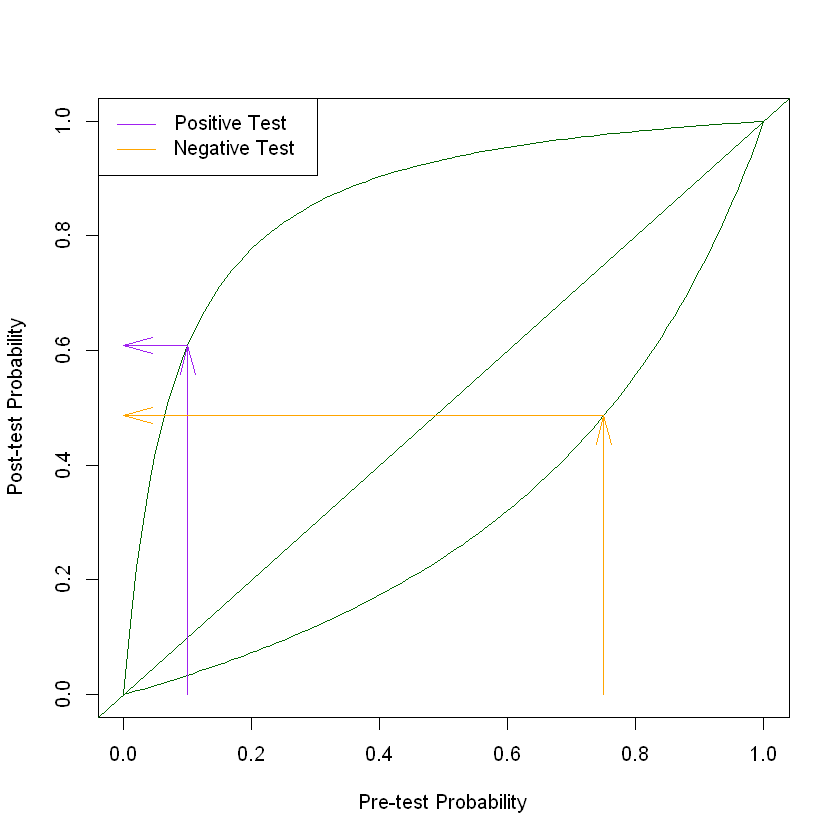

In [1]:
#function takes as arguments the sensitivitiy of the test (sensi) 
#and the specificity (speci)

leafplot <- function(sensi, speci){
  
  pretest <- seq(0, 1, 0.01) #possible pre-test probabilities 
  
  #probability of having Covid-19 after a positive test result 
  pos.test <- sensi*pretest/(sensi*pretest+(1-speci)*(1-pretest))
  
  #probability of having Covid-19 after a negative test result 
  neg.test <- ((1-sensi)*(pretest))/((1-sensi)*pretest+speci*(1-pretest))
  
  #plot leaves
  plot(pretest, pos.test, type="l", col="darkgreen", 
     xlab="Pre-test Probability", ylab="Post-test Probability")
  points(pretest, neg.test, type="l", col="darkgreen")
  abline(a=0, b=1, col="darkgreen")
  legend("topleft", legend=c("Positive Test", "Negative Test"),
        col=c("Purple", "Orange"), lty=1, bg="transparent")
  
  #plot arrows 
    #we use pretest[11] to get the prevalence value of 0.1, and 
    #pretest[76] to get the prevalence value of 0.75 in the vector "pretest"
    
  arrows(pretest[11], 0, pretest[11], pos.test[11], angle=15, col="purple")
  arrows(pretest[11], pos.test[11], 0, pos.test[11], angle=15, col="purple")
  arrows(pretest[76], 0, pretest[76], neg.test[76], angle=15, col="orange")
  arrows(pretest[76], neg.test[76], 0, neg.test[76], angle=15, col="orange")
  
  }

leafplot(sensi=0.7, speci=0.95)


#See what happens to the plot when you change sensitivity and specificity! 
#leafplot(0.95, 0.8)

## 9.7 The Bayesian paradigm in Health data science problems. 

We end this section with a discussion on the Bayesian approach in Health data science problems. Some features of the Bayesian paradigm are particularly useful in this context: 
> 1.	Bayes theorem provides a statistically principled method for combining data. Thus, we can take into account the context within which the data are generated. For example, results of a diagnostic test may have a different interpretation/consequence if used in a symptomatic patient than in a general screening programme. The prior probability of disease would be higher in the former than the latter. Priors can then be updated by the test result to give an assessment of disease risk specific to the local prevalence.
> 2.	For problems where there are multiple or diverse sources of data which must be combined, the Bayesian framework provides a natural environment for doing so. Examples where Bayesian synthesis of information is common are:         
•	models of biological systems, for example genetic and genomic pathways,                     
•	models of the natural history of diseases over time and relationships with clinical events,           
•	economic models of disease trajectories and cost-effect trade-offs for interventions that interrupt the trajectories,   
•	ecological studies of pollutant emissions and effects on population health,       
•	demographic studies, for example to study migration,          
•	speech recognition software,                 
•	other pattern recognition models such as medical imaging or search engines,                 
•	epidemic modelling.                       
In all these examples complex data is synthesised and/or used to update outputs.             
> 3.	Bayesian models fit well into decision theory methodology, providing we can also specify consequences of model outputs.
> 4.	In many examples, especially those that aim to model complicated processes, some of the data inputs are very sparse, or even non-existent. In such cases, prior data may be formally elicited from an expert panel and incorporated in a Bayesian analysis. Examples include multiple evidence synthesis and identification of latent groups.
> 5.	Bayesians are allowed to make direct probability statements about unknown quantities. Frequentists cannot make these direct probability statements because the unknown model parameters are assumed fixed.
> 6.	In recent years the resources available to complete Bayesian analysis have increased, including bespoke software and packages within commercial statistical software.

But Bayesian methods are not that widely used in statistics compared with more classical approaches because they have some limitations.
> 1.	Sometimes the need for a prior distribution is a barrier if little is known about a parameter and researchers fall back on priors that are weakly informative. In that case, it is not easy to see how much benefit comes from a Bayesian analysis.
> 2.	Because of the need to use Bayesian updating via a prior distribution, the analysis almost always requires a parametric approach. This limits the structure of the analysis models. Although non-parametric Bayesian methods are available for some situations, they often have underlying parametric assumptions.
> 3.	The numerical integration methods usually required for realistic problems are often computationally expensive. This is especially true if there are multiple sources of evidence to be combined.
> 4.	Many statisticians are unfamiliar with the methods and associated software.

## Part 2:

## 9.8 Bayes thorem for discrete and continous data.

In part 1, we looked at Bayes theorem in the discrete case. We turn to the more general case of Bayes thorem to make inference about an unknown parameter $\theta$, which could be discrete or continuous. The probability distribution for $\theta$ reflects our uncertainty about it before seeing the data, *prior distribution*, $p(\theta)$. Once the data data $y$ is known, we condition on it. Using Bayes theorem we obtain a conditional probability distribution for unobserved quantities of interest given the data. If $\theta$ is continuous, we have:

\begin{equation}
p(\theta \mid y)= \frac{ p(\theta)\, p(y \mid \theta)}{\int  p(\theta)\,p(y \mid \theta)\,d\theta},
\end{equation}

and $\theta$ is discrete and takes values in the set $\Theta$, we have: 


\begin{equation}
p(\theta \mid y)= \frac{ p(\theta)\, p(y \mid \theta)}{\sum_{\theta \in \Theta}  p(\theta) p(y \mid \theta) }.
\end{equation}


We call $p(\theta \mid y)$ the *posterior distribution*. 

Note that the Bayesian approach is naturally synthetic in that it allows data from different sources to be combined, according to Bayes principles. This approach is most useful when there is informative prior information. We note that the Bayesian approach can be recursive, so $p(\theta \mid y)$ may be used as a prior when calculating $p(\theta \mid y, z)$ for a second data set $z$. 

The denominator, ${\int  p(\theta)\,p(y \mid \theta)\,d\theta}$ or $\sum_{\theta \in \Theta}  p(\theta) p(y \mid \theta)$, is a constant with respect to $\theta$. One of the challenges of using Bayesian approaches is that the integration can be analytically intractable, so that numerical methods are needed (for example, numerical integration or Markov Chain Monte Carlo methods). You can learn more about this in the Bayesian module in the second semester, if you choose to take it. In this introductory course, we will only look at examples where this constant need not be calculated, since the form of the posterior can be inferred by inspection once observing that the posterior is proportional to the product of the prior and likelihood: 

$$p(\theta \mid y) \propto p(\theta)\,p(y \mid \theta).$$

We will see how this works for the inference of proportions. 

## 9.9 Bayesian inference on proportions

Consider a new drug being developed for the relief of chronic pain. To find out about its efficacy, we propose to run a single-arm early-phase clinical trial in which we give this drug to a number $n$ of randomly selected patients. Because patients are independent of each other, so it seems reasonable to model the data using the Binomial distribution, $Y\sim Bin(n,\theta).$ We have that $\theta\in [0,1]$ is the probability of pain relief (success) in each patient, and this is unknown. We then make the observation that there are $y$ successes out of $n$ independent trials. As a reminder, the probability distribution function of the Binomial distribution is:  

\begin{equation}
p \left(y \mid \theta \right) = {n \choose y} \theta^y (1-\theta)^{n-y}.
\end{equation}

To proceed, we need to have a prior distribution for $\theta$. Let us consider three possible prior distributions: 

1. An uninformative prior, where all values of $\theta$ are equally probable.   
   You essentially have no prior information about the effectiveness of the drug.   
2. A symmetrical, concave prior that is centered at 0.5.   
   You think that the drug is likely to be effective for patients around half of the time.      
3. An asymmetrical prior with a spike at 0.1.     
   You think that the drug is generally ineffective, and feel quite strongly about it.   

Now, the Beta distribution is a flexible distribution that can represent each of these prior beliefs by appropriate choice of its parameters. It is also convenient because it has a similar form to the Binomial distribution. 

### 9.9.1 The Beta prior 


The Beta distribution is a flexible two parameter distribution that is restricted to the interval between 0 and 1, and so it is a reasonable form for a probability distribution for a proportion. The two parameters, $a$ and $b$, are often called  "shape" parameters. Given $\theta \sim \hbox{Beta}(a,b)$, the probability density function, expectation and variance of the distribution are as follows: 

\begin{eqnarray}
p(\theta|a, b) & = & \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \,\,
\theta^{a-1} \; (1-\theta)^{b-1}  \mbox{  where  } \theta \in (0,1) \label{eqn.beta1}\\
{E}( \theta |a, b) &= &   \frac{a}{a+ b }     \label{eqn.beta2}\\
{Var}( \theta |a, b) &= &   \frac{a b}{ (a+ b)^2 (a+ b+1)} \label{eqn.beta3}
\end{eqnarray}

The *Gamma function* $\Gamma(x)$ is defined for positive integers as $\Gamma (x)=(x-1)!$, and has a more complex form for real numbers.    

This prior distribution is very flexible. For example: 

1. $a=1, b=1$ results in the uniform distribution
2. $a=2, b=2$ results in a symmetrical distribution centered on $p=0.5$
3. $a=2, b=9$ results in an asymmetrical distribution with a spike at $p=0.1$. 

These are the priors we specified earlier; they are plotted below. Note that the higher the values of $a, b,$ the
smaller the variance of the distribution. 

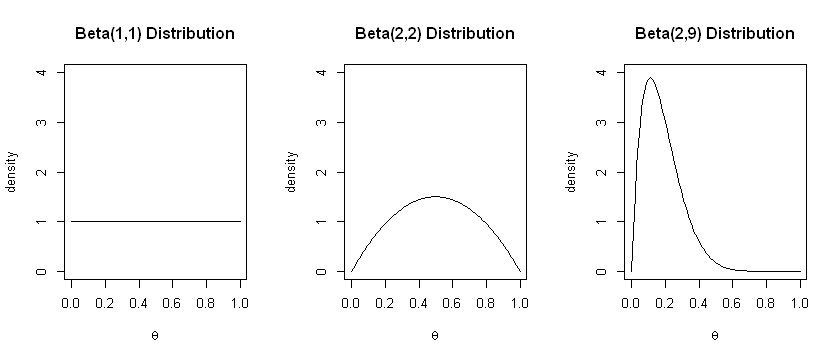

In [2]:
options(repr.plot.width=7, repr.plot.height=3)
theta <- seq(0, 1, 0.01)
par(mfrow=c(1,3))
plot(theta, dbeta(theta, 1, 1), type="l", main="Beta(1,1) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(theta, dbeta(theta, 2, 2), type="l", main="Beta(2,2) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(theta, dbeta(theta, 2, 9), type="l", main="Beta(2,9) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")

### 9.9.2 Posterior 

Now, we apply Bayes theorem to obtain the posterior distribution using a $Beta(a,b)$ distribution for the prior:  

\begin{align}
\begin{split}
p(\theta \mid y) &= \frac{ p(\theta)\, p(y \mid \theta)} {\int  p(\theta)\,p(y \mid \theta)\,d\theta}\\
        & \propto  p(\theta)\, p(y \mid \theta)\\
       & =\frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1}  {n \choose y} \theta^y (1-\theta)^{n-y} \\
        & \propto \theta^{a-1} (1-\theta)^{b-1} \theta^y (1-\theta)^{n-y} \\
        & \propto \theta^{a+y-1} (1-\theta)^{b+n-y-1}
\end{split}
\end{align}


Now by inspection, we can see that this is in the form of a Beta distribution: we have that the posterior is proportional to $\theta^{a+y-1} (1-\theta)^{b+n-y-1}$. In other words, the posterior is $Beta(a+y, b+n-y).$ This distribution has mean given by: $\frac{a+y}{a+b+n}$ and variance $\frac{(a+y)(b+n-y)}{(a+b+n)^2(a+b+n+1)}.$  

Suppose the data we observe is $y=4$ successes out of a total of $10$ patients. Then: 

1. With the uniform $Beta(1,1)$ prior, our posterior is $Beta(5, 7)$. 
2. With the symmetrical $Beta(2, 2)$ prior, our posterior is $Beta(6, 8)$.
3. With the asymmetrical $Beta(2, 9)$ prior, our posterior is $Beta(6, 15)$. 

We plot the possible distibutions below: 

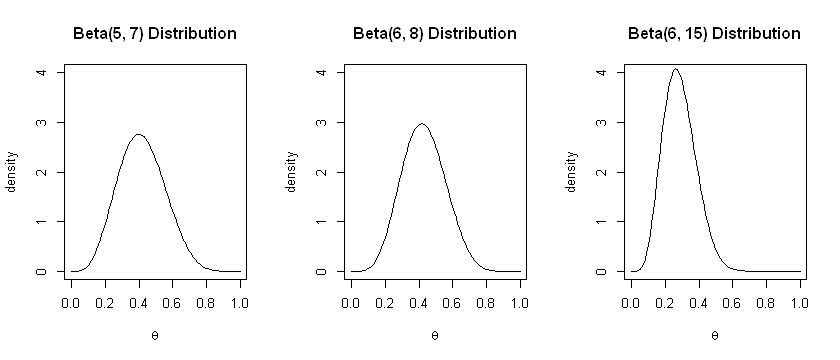

In [3]:
p <- seq(0, 1, 0.01)
par(mfrow=c(1,3))
plot(p, dbeta(p, 5, 7), type="l",  main="Beta(5, 7) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(p, dbeta(p, 6, 8), type="l", main="Beta(6, 8) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(p, dbeta(p, 6, 15), type="l", main="Beta(6, 15) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")

We can see that the uninformative prior leads to the posterior with the highest variance amongst the three. The narrow prior in the third example shifts the posterior distribution to the right. We can see that different choices of prior lead to different results. For this reason, it is often recommended to repeat analyses with different priors to see how much the results change: this is called *sensitivity analysis*. 

## 9.10 Summarising Posteriors

We often display the posterior distribution graphically to get a sense of the information that we have about the parameter. However, other ways to summarize the distribution can be helpful.  

We may also wish to summarise the posterior distribution by a credible interval. Remember that a classical $100(1−\alpha)\%$ confidence interval is defined such that, if the data collection process is repeated again and again, then in the long run, $100(1 − \alpha)\%$of the confidence intervals formed would contain the true parameter value. Now, a Bayesian $100(1 − \alpha)\%$ credible interval is an interval which contains $100(1 − \alpha)\% $ of the posterior distribution of the parameter. There may be several different credible intervals such that the interval contains $100(1 − \alpha)\%$ of the distribution. The $100(1 -\alpha) \%$ Highest Posterior Density (HPD) interval ($\alpha \in (0,1)$) is the credible interval with the smallest range of values for $\theta$ (providing the posterior is concave). Algebraically, this is the region $[\theta_L,\theta_U]$ that contains $100( 1 - \alpha)\%$
of the probability, such that:

$P(\theta \in [
\theta_L,\theta_U])=1-\alpha$ such that for all $\theta_O \notin  [
\theta_L,\theta_U]$ and all  $\theta_I\in[
\theta_L,\theta_U],$ $p(\theta_O|y) <
p(\theta_I|y).$

In our previous example, when we used the asymmetrical $Beta(2, 9)$ prior, our posterior was $Beta(6, 15)$. The posterior mean is $\frac{6}{6+15}=0.286$. The $90\%$ HPDI is $(0.13, 0.44)$. We plot the distribution below and check that the area between these two values gives us 0.9. Now, note that the interval (0.144, 0.47) also gives us an area of 0.9, but this interval is wider. In a sense, the HPDI is the "tightest" interval so that the area under the posterior distribution is $\alpha$.

[1] 0.8970097

[1] 0.9049178

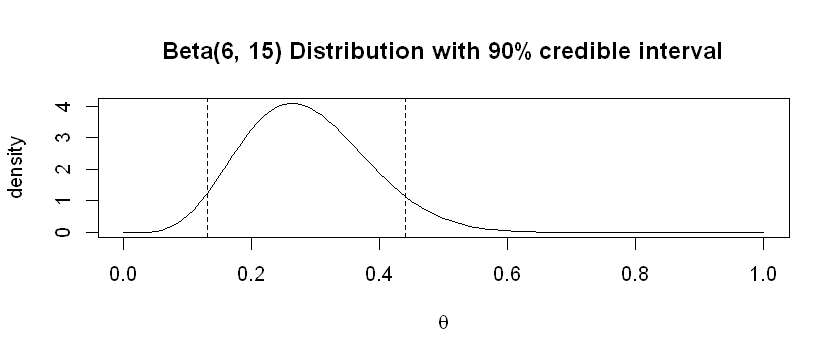

In [4]:
plot(p, dbeta(p, 6, 15), type="l", main="Beta(6, 15) Distribution with 90% credible interval",  xlab=expression(theta), ylab="density")
abline(v=0.44, lty="dashed")
abline(v=0.13,  lty="dashed")

#Area under the 90% HDPI
pbeta(0.44, 6, 15)-pbeta(0.13, 6, 15)

#The interval (0.47. 0.144) also a 90% credible interval 
pbeta(0.47, 6, 15)-pbeta(0.144, 6, 15)

## 9.11 Prior Predictions

Before observing a quantity $y$, we can provide its predictive distribution by integrating out the unknown parameter,

$$p(y) = \int p(y|\theta) p(\theta) d\theta.$$

Predictions are useful in many settings, for example forecasting, cost-effectiveness models and design of
studies. In the trial described earlier in this section, we had 10 patients. Suppose we are interested in predicting the number of patients who will have a positive response. Recall that the Beta distribution is a suitable prior distribution for $\theta$, the proportion of positive responses. We have:

\begin{align}
	\theta &\sim \hbox{Beta}(a,b) \\
	y &\sim \hbox{Binomial}(\theta,n)
\end{align}

The exact predictive distribution $p(y)$ can be computed analytically and is known as the *Beta-Binomial* distribution. It has the complex form with three parameters,  number of trials $n$ and shape parameters, $a$ and $b$: 

\begin{align}
p(y) &=  \frac{ \Gamma (a+ b)}{ \Gamma (a) \Gamma (b) }  {n \choose y}  \frac{\Gamma (a+ y) \Gamma (b+n-y)}{\Gamma (a+b+n)} \\
\mathbb{E}(y) &=  n \frac{a}{a+b}
\end{align}


Given that we use the asymmetrical $Beta(2, 9)$ prior, our predictive distribution would be: 

\begin{equation}
p(y) =  \frac{ \Gamma (11)}{ \Gamma (2) \Gamma (9) }  {10 \choose y}  \frac{\Gamma (2+ y) \Gamma (19-y)}{\Gamma (21)},
\end{equation}

with $\mathbb{E}(y) =  10 \frac{2}{11} = 1.81$. So, before observing any data, we would predict around 2 patients to have a positive response out of 10.


### 9.11.1 Posterior Prediction

Suppose that have observed $y$, and we want to predict future observations $z$, assuming that $z$ and $y$ are independent, conditional on $\theta$. The posterior predictive distribution for $z$ is given by,

\begin{align}
p(z|y) &= \int p(z, \theta | y) d \theta \\
     &= \int p(z |y, \theta) p(\theta |y ) d \theta \\ 
     & = \int p(z | \theta) p(\theta |y ) d \theta 
\end{align}

We are now weighting the probability distribution function for $z$ with our posterior belief after having observed $y$. 

For our example, we found that the posterior distribution $p(\theta |y ) $ is a Beta($a+y, b+n-y$) distribution. Thus our posterior predictive distribution is a Beta-binomial distribution with the number of trials $n_p$ and shape parameters $a+y, b+n-y$.   

Now, given that we use the asymmetrical $Beta(2, 9)$ prior, and then observe that $y=4$ patients out of $n=10$ had a successful result, and we wish to predict how many sucesses $z$ out of $n_p=20$ to expect, our posterior predictive distribution is a Beta-binomial with parameters $20$ and shape parameters $6$ and $15$. The expectation of this distribution is $\mathbb{E}(y) =  20 \frac{6}{21} \approx 6$ patients. 

## 9.12 Conjugacy 

In the example with the Beta-Binomial model, we found that using the Beta distribution for the prior lead us to a posterior distribution that is also a Beta distribution. This is not a coincidence. Often, a particular distributional family is chosen for the prior, so that the resulting posterior distribution belongs to the same family. This is called a conjugate prior. Below are the conjugate priors for some common likelihood models. 

| Likelihood | Conjugate Prior | 
|:-|:-|
| Bernoulli | Beta | 
| Binomial | Beta |
| Poisson | Gamma |
| Geometric | Beta |
| Normal | Normal, Gamma and a few others |
| Exponential | Gamma |
| Gamma | Gamma |

## 9.13 Exercise 

Suppose that there is an experiment where $n$ patients are asked to try different treatments each time they get a headache. We are interested in the number of different treatments a patient takes before they find one that is successful. For patient $i$, for $1 \leq i \leq n$, we denote by $y_i$ the number of treatments tried before the first success. Note that $\left\{ y_1, y_2, ..., y_n \right\}$ are a sample from a Geometric distribution: $y_i \sim Geom(\theta)$. The probability density function of a geometric distribution is: 

$$p(y | \theta) = \theta (\theta -1)^{y-1}$$

Suppose we wish to make inference on $\theta$. By specifying a Beta prior for $\theta$: $\theta \sim Beta(a, b)$, derive the posterior distribution of $\theta$. 

Solution: 


\begin{align}
\begin{split}
p(\theta \mid y_1, ..., y_n) 
        & \propto  p(\theta) \prod_{i=1}^n p(y_i \mid \theta)\\
               & \propto  \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1} \prod_{i=1}^n \theta (\theta -1)^{y-1}\\
       & \propto  \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1}  \theta^n (\theta -1)^{\sum_{i=1}^n y_i-n}\\
       & \propto  \theta^{a+n-1} (\theta -1)^{\sum_{i=1}^n y_i -n +b-1}
\end{split}
\end{align}

This is a Beta distribution with parameters $a+n$ and $\sum_{i=1}^n y_i-n+b$.